# Student Scores Analysis

### Importing necessary Libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [51]:
student_scores = pd.read_csv('Student_Scores.csv', sep=',', encoding='latin-1')

print('Data before deleting duplicates', student_scores.shape)
print('Data after deleting duplicates', student_scores.drop_duplicates().shape)

student_scores.head()

Data before deleting duplicates (30641, 15)
Data after deleting duplicates (30641, 15)


,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


### Basic data exploration

In [52]:
student_scores.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [53]:
student_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [54]:
isnull = student_scores.isnull().sum()
isnull

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

<Axes: >

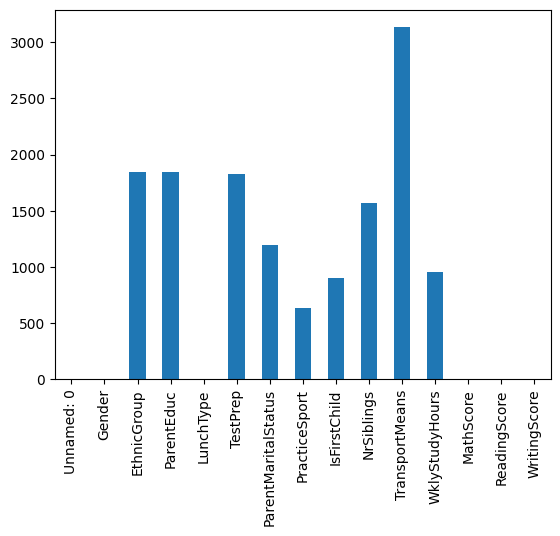

In [55]:
isnull.plot(kind='bar')

### Dropping the unnamed column

In [56]:
student_scores.drop('Unnamed: 0', axis=1, inplace=True)
student_scores.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


### Gender Distribution

In [57]:
groupedData = student_scores.groupby('Gender').size()
groupedData

Gender
female    15424
male      15217
dtype: int64

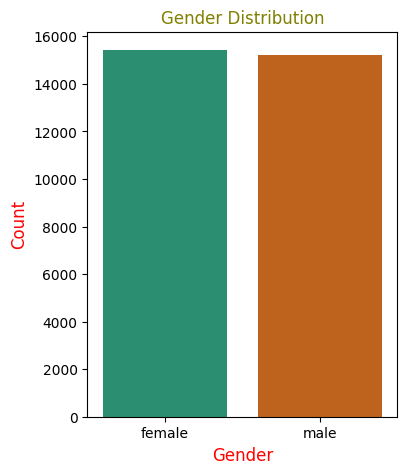

In [182]:
plt.figure(figsize=(4,5))
sns.countplot(data=student_scores, x='Gender', palette='Dark2')
plt.ylabel('Count', color='r', fontsize=12)
plt.xlabel('Gender', color='r', fontsize=12)
plt.title('Gender Distribution', c='olive')
plt.show()

- From the above chart, we have analysed that the number of female students are slightly more than the number of male students

### Analysis based on Parent Education

In [59]:
groupedData = student_scores.groupby('ParentEduc').agg({'MathScore':'mean', 'ReadingScore':'mean', 'WritingScore':'mean'})
groupedData

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


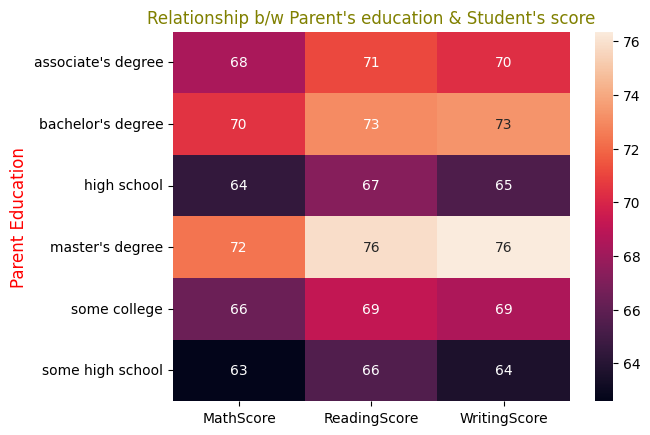

In [60]:
sns.heatmap(groupedData, annot=True)
plt.ylabel('Parent Education', color='red', size=12)
plt.title("Relationship b/w Parent's education & Student's score", c='olive')
plt.show()

- By looking at the above heatmap chart, we can easily say that Parent's education is correlated with the marks their kids are getting. 

### Analysis based on Parent's marital status

In [61]:
groupedData1=student_scores.groupby('ParentMaritalStatus').agg({'MathScore':'mean', 'ReadingScore':'mean', 'WritingScore':'mean'})
groupedData

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


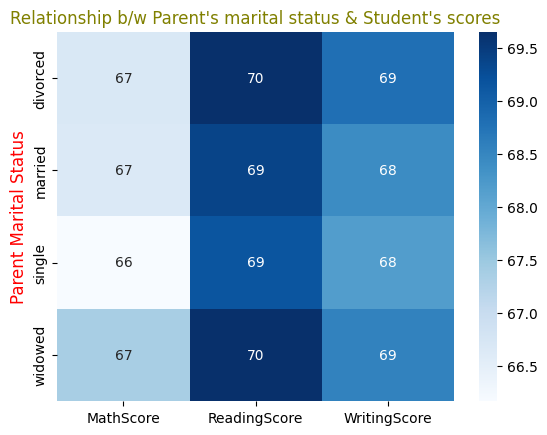

In [64]:
sns.heatmap(groupedData1, annot=True, cmap='Blues')
plt.ylabel('Parent Marital Status', c='red', size=12)
plt.title("Relationship b/w Parent's marital status & Student's scores", c='olive')
plt.show()

- From the above heatmap chart we can conclude that there is no or negligible differences in the marks of the students. Hence, Parent Marital Status is not impacting the marks of their kids

### Checking the outliers

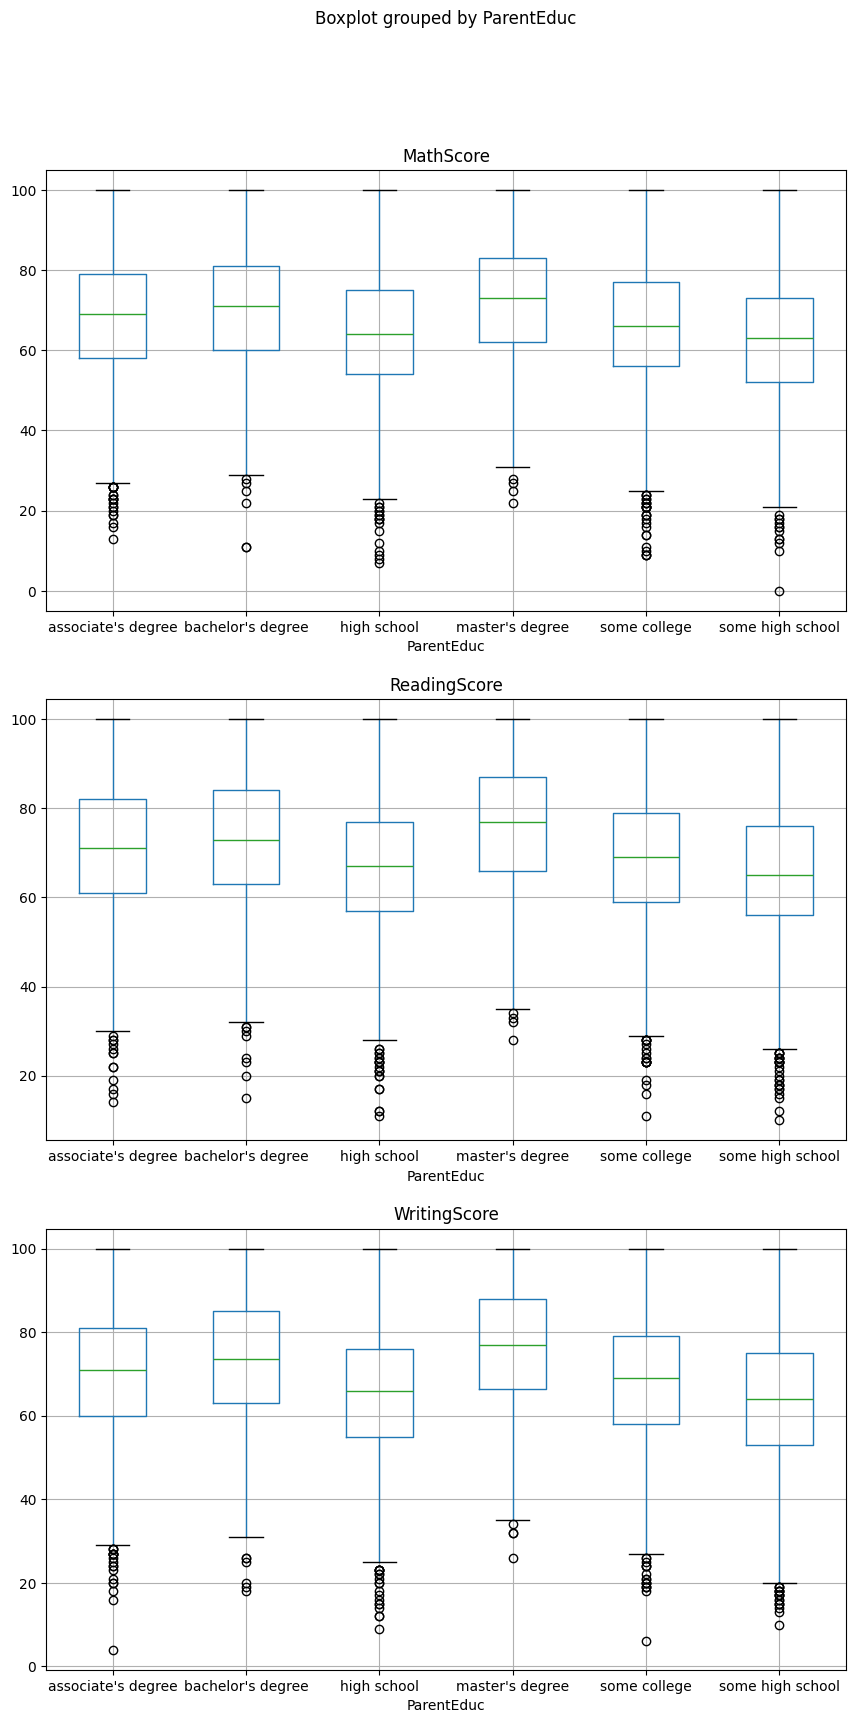

In [80]:
cols = ['MathScore', 'ReadingScore', 'WritingScore']
byVariable = 'ParentEduc'

fig, subCanvas = plt.subplots(nrows=3, ncols=1, figsize=(10,20))

for col, plotArea in zip(cols, range(len(cols))):
    student_scores.boxplot(column=col, by=byVariable, ax=subCanvas[plotArea])

### Distribution of Ethnic Groups

In [98]:
print(student_scores['EthnicGroup'].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


In [108]:
groupedData2 = student_scores.groupby('EthnicGroup').count()
groupedData2

,Gender,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
EthnicGroup,,,,,,,,,,,,,
group A,2219,2078,2219,2081,2121,2167,2168,2096,1999,2146,2219,2219,2219
group B,5826,5470,5826,5488,5605,5704,5649,5546,5238,5642,5826,5826,5826
group C,9212,8652,9212,8652,8858,9050,8929,8763,8280,8933,9212,9212,9212
group D,7503,7056,7503,7070,7218,7343,7285,7106,6713,7270,7503,7503,7503
group E,4041,3814,4041,3804,3892,3954,3918,3820,3624,3924,4041,4041,4041


In [137]:
groups = ['group A', 'group B', 'group C', 'group D', 'group E']
variable = 'EthnicGroup'
mlist = []

for i in groups:
    count = student_scores[variable][student_scores[variable] == i].count()
    mlist.append(count)
    
print(mlist)

[2219, 5826, 9212, 7503, 4041]


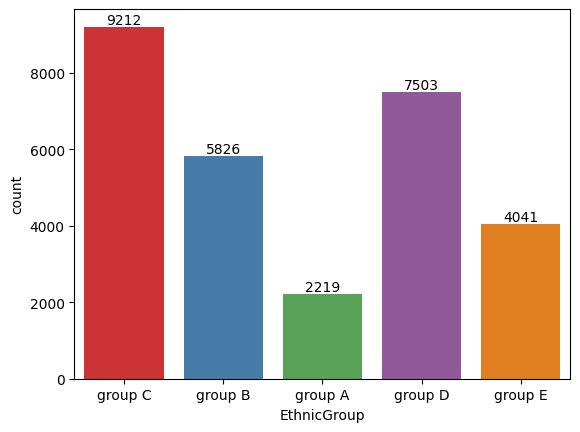

In [201]:
ax = sns.countplot(data=student_scores, x='EthnicGroup', palette='Set1')
for container in ax.containers:
    ax.bar_label(container)

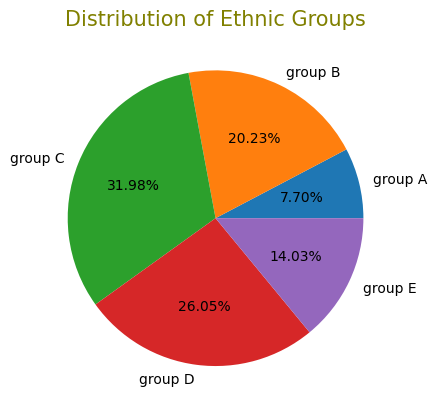

In [162]:
plt.pie(mlist, labels=groups, autopct='%.2f%%')
plt.title('Distribution of Ethnic Groups', c='olive', size=15)
plt.show()

- By looking at the above pie chart, we can now clearly conclude that group C hold the maximum share of 31.98% followed by group D that is 26.05% and then the groups B, E and A by 20.23%, 14.03% and 7.70% respectively.